# Exercise 4.9

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 4\23-11-2024 Instacart Basket Analysis'

In [4]:
#importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated.pkl'))

In [5]:
df.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders


### Creating a Bar Charts

<Axes: xlabel='orders_day_of_week'>

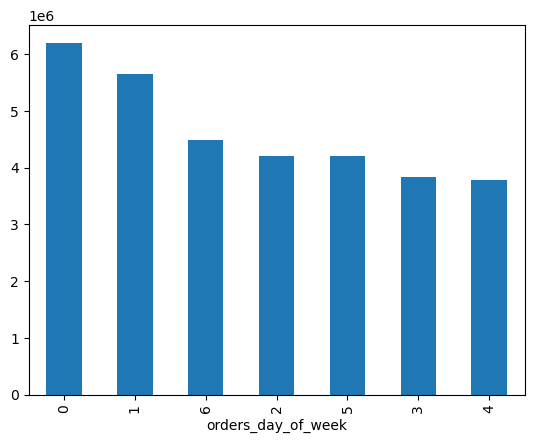

In [6]:
df['orders_day_of_week'].value_counts().plot.bar()

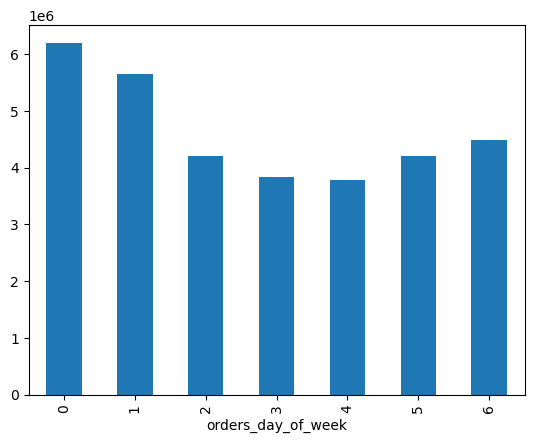

In [7]:
# Indexing by order of week days
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [13]:
df['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [15]:
df['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

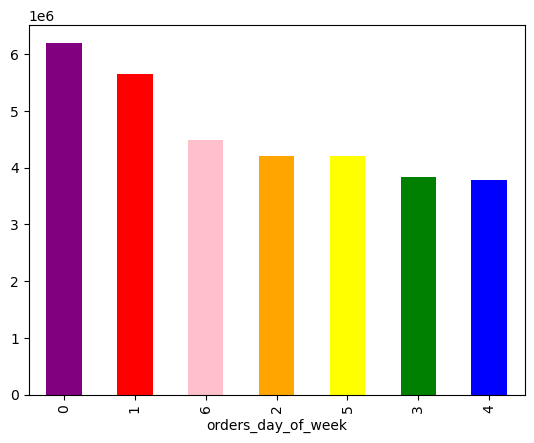

In [8]:
# Editing colors
df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

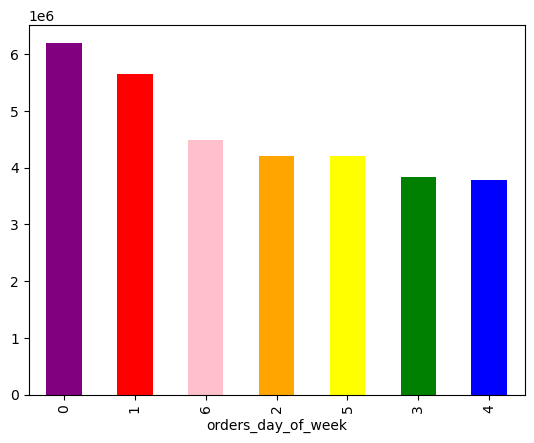

In [20]:
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [21]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 3. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

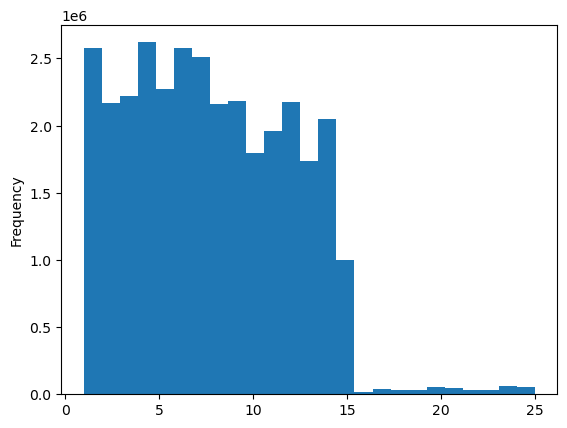

In [11]:
# Creating Histogram on 'price' frequency
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

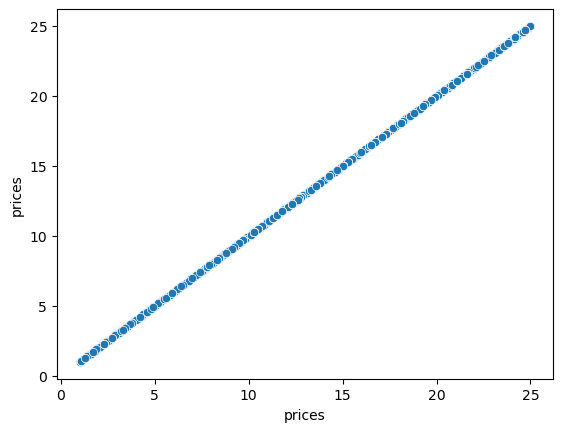

In [12]:
# Creating Scatterplot on 'prices' on both axes
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [9]:
df.loc[df['prices'] > 100]

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day


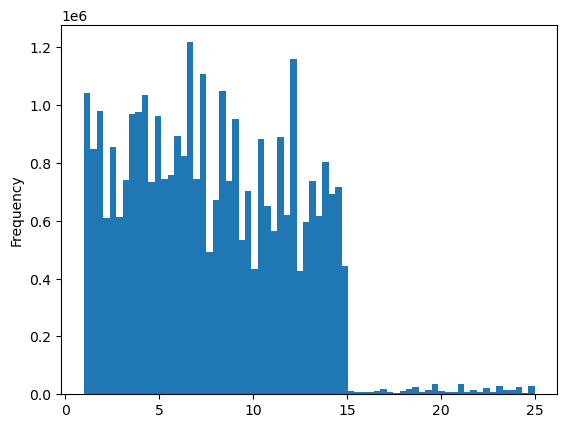

In [13]:
# Creating Histogram on 'prices' frequency with more granularity
hist_2 = df['prices'].plot.hist(bins = 70)

In [14]:
# saving histogram hist_2
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_prices.png'))

In [24]:
# Create a liste holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [25]:
# Checking dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [30]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [33]:
# Checking results
len(df)

32404859

In [34]:
# Combining big and small splits to confirm results
len(big) + len(small)

32404859

In [35]:
# Creating Dataframe subset with needed columns
df_2 = small[['orders_day_of_week', 'prices']]

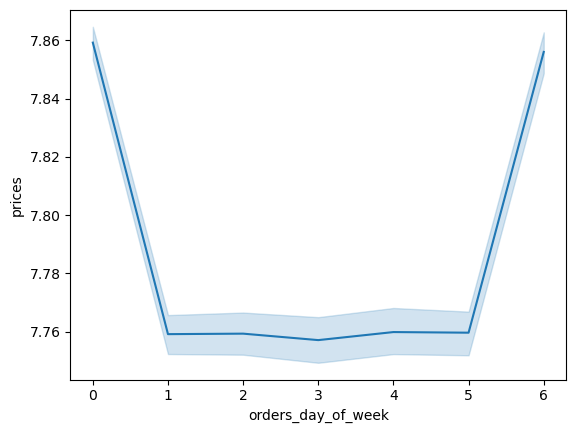

In [36]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [37]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_orders_dow.png'))